In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import ppscore as pps

%matplotlib inline

CONVENÇÕES USADAS NESTA ANÁLISE:
- os nomes das colunas estarão em MAIÚSCULO nos comentários para se destacar - exemplos: ID_SOLICITANTE, PRODUTO_SOLICITADO
- Sempre que uma função ou um método de alguma biblioteca for usado pela primeira vez haverá uma breve explicação sobre ele

In [3]:
#IMPORTANDO OS DADOS

#importei os dados de Treino com o -pd.read_csv-
train = pd.read_csv('conjunto_de_treinamento.csv')
#importei os dados de Teste com o -pd.read_csv-
test = pd.read_csv('conjunto_de_teste.csv')

# EXPLORAÇÃO DOS DADOS

In [425]:
#visualização de uma amostra dos dados, usamos a transposta para poder ver todas as Colunas
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
id_solicitante,1,2,3,4,5,6,7,8,9,10
produto_solicitado,1,1,1,1,7,1,1,1,2,1
dia_vencimento,10,25,20,20,1,20,15,5,25,10
forma_envio_solicitacao,presencial,internet,internet,internet,internet,presencial,presencial,internet,internet,presencial
tipo_endereco,1,1,1,1,1,1,1,1,1,1
sexo,M,F,F,M,F,M,F,F,F,M
idade,85,38,37,37,51,21,64,20,39,44
estado_civil,2,1,2,1,1,1,4,1,2,2
qtde_dependentes,0,0,0,1,3,1,2,0,2,2
grau_instrucao,0,0,0,0,0,0,0,0,0,0


Conclusões:
- Temos colunas com VARIÁVEIS CATEGÓRICAS (numéricas e palavras)
- Temos colunas com VARIÁVEIS CONTÍNUAS (numéricas) 

In [417]:
#informações extra sobre cada conluna, temos a seguinte ordem (INDEX) #-# (NOME DA COLUNA) #-# (CONTAGEM DE VALORES NÃO FALTANTES) #-# (TIPO DOS DADOS NA COLUNA) 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_solicitante                    20000 non-null  int64  
 1   produto_solicitado                20000 non-null  int64  
 2   dia_vencimento                    20000 non-null  int64  
 3   forma_envio_solicitacao           20000 non-null  object 
 4   tipo_endereco                     20000 non-null  int64  
 5   sexo                              20000 non-null  object 
 6   idade                             20000 non-null  int64  
 7   estado_civil                      20000 non-null  int64  
 8   qtde_dependentes                  20000 non-null  int64  
 9   grau_instrucao                    20000 non-null  int64  
 10  nacionalidade                     20000 non-null  int64  
 11  estado_onde_nasceu                20000 non-null  object 
 12  esta

- Temos colunas dos tipos INT64, FLOAT64, OBJECT.

In [225]:
#vendo melhor a quantidade de valores nulos nas colunas citadas acima
train.isnull().sum()

id_solicitante                          0
produto_solicitado                      0
dia_vencimento                          0
forma_envio_solicitacao                 0
tipo_endereco                           0
sexo                                    0
idade                                   0
estado_civil                            0
qtde_dependentes                        0
grau_instrucao                          0
nacionalidade                           0
estado_onde_nasceu                      0
estado_onde_reside                      0
possui_telefone_residencial             0
codigo_area_telefone_residencial        0
tipo_residencia                       536
meses_na_residencia                  1450
possui_telefone_celular                 0
possui_email                            0
renda_mensal_regular                    0
renda_extra                             0
possui_cartao_visa                      0
possui_cartao_mastercard                0
possui_cartao_diners              

- Algumas colunas como "GRAU_INSTRUCAO_COMPANHEIRO", "PROFISSAO_COMPANHEIRO", "PROFISSAO", "OCUPACAO", "TIPO_RESIDENCIA", "MESES_NA_RESIDENCIA" possuem valores faltantes, trataremos desse assunto mais pra frente.

In [424]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id_solicitante,20000.0,10000.500000,5773.647028,1.0,5000.75,10000.5,15000.25,20000.0
produto_solicitado,20000.0,1.284350,1.008239,1.0,1.00,1.0,1.00,7.0
dia_vencimento,20000.0,13.147250,6.748507,1.0,10.00,10.0,20.00,25.0
tipo_endereco,20000.0,1.006350,0.079435,1.0,1.00,1.0,1.00,2.0
idade,20000.0,42.352500,14.930177,7.0,31.00,40.0,52.00,106.0
estado_civil,20000.0,2.120850,1.332004,0.0,1.00,2.0,2.00,7.0
qtde_dependentes,20000.0,0.666400,1.236725,0.0,0.00,0.0,1.00,53.0
grau_instrucao,20000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
nacionalidade,20000.0,0.961600,0.202305,0.0,1.00,1.0,1.00,2.0
tipo_residencia,19464.0,1.261303,0.883580,0.0,1.00,1.0,1.00,5.0


----------

## Investigando as colunas:

----------

### 1) id_solicitante

In [419]:
train['id_solicitante'].head()

0    1
1    2
2    3
3    4
4    5
Name: id_solicitante, dtype: int64

- Se trata de apenas uma Distribuição Uniforme e não terá nenhum valor pro nosso modelo, mas pode ser útil em um Merge futuro de DataFrames, então resolvi mante-la.

----------

### 2) produto_solicitado

Coluna de dados numéricos categóricos dividida nas classes abaixo

- 1 = Cartão de crédito
- 2 = Empréstimo Pessoal
- 7 = Empréstimo Consignado

In [221]:
#Retorna a soma da contagem de valores únicos das classes da coluna PRODUTO_SOLICITADO
train['produto_solicitado'].value_counts()

1    17023
2     2435
7      542
Name: produto_solicitado, dtype: int64

In [222]:
#Retorna a proporção de valores únicos das classes da coluna PRODUTO_SOLICITADO
train['produto_solicitado'].value_counts(normalize=True)

1    0.85115
2    0.12175
7    0.02710
Name: produto_solicitado, dtype: float64

- A categoria -CARTÃO DE CRÉDITO- tem 85.115% do total.
- A categoria -EMPRÉSTIMO PESSOAL- tem 12.175% do total.
- A categoria -EMPRÉSTIMO CONSIGNADO- tem 2.710% do total 

A classe CARTÃO DE CRÉDITO tem a grande maioria dos valores.

GRÁFICOS DE BARRAS e PIZZA

A hipótese é a seguinte...há alguma desbalanço entre as classes da coluna PRODUTO_SOLICITADO ?

A célula anterior mostrou isso em números mas vamos visualizar com mais clareza, e como nossa variável é categórica um gráfico de barras vai me mostrar muito bem.

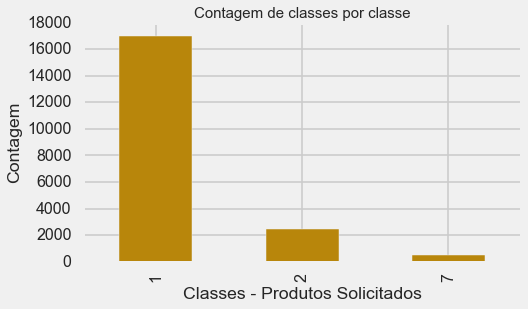

In [699]:
#Podemos ver a contagem das classes de forma mais clara em um gráfico de barras.

#tema do gráfico
matplotlib.style.use('seaborn-poster')
#ajusto o tamanho do gráfico
fig = plt.figure(figsize=(7,4))
#gráfico de barras com proporção das classes da coluna PRODUTO_SOLICITADO.
train['produto_solicitado'].value_counts().plot.bar(color='#b8860b')
#título
plt.title('Contagem de classes por classe', fontdict={'fontsize':15})
#rótulo eixo-y
plt.ylabel('Contagem')
#rótulo eixo-x
plt.xlabel('Classes - Produtos Solicitados')
#mostro o gráfico
plt.show()

Classe 1 (CARTÃO DE CRÉDITO) dominante seguida da 2 (EMPRÉSTIMO PESSOAL) e 7 (EMPRÉSTIMO CONSIGNADO)

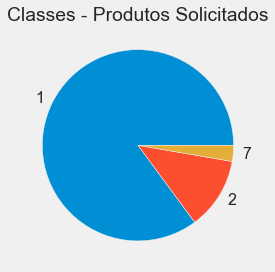

In [698]:
#Podemos ver essa proporções de forma mais clara em um gráfico de pizza.
fig = plt.figure(figsize=(4,4))
matplotlib.style.use('seaborn-poster')
#gráfico de pizza com proporção das classes da coluna PRODUTO_SOLICITADO.
train['produto_solicitado'].value_counts().plot.pie()
plt.ylabel('')
plt.title('Classes - Produtos Solicitados')
plt.show()

- Como já vimos nos números e no gráfico de barras a classe CARTÃO DE CRÉDITO tem a maioria dos valores seguido por EMPRÉSTIMO PESSOAL e EMPRÉSTIMO CONSIGNADO, esses dois gráficos ilustram melhor essas proporções.

In [5]:
#cria uma tabela de proporções normalizada pelos Index que nesse caso são os PRODUTOS_SOLICITADOS
tabela_produto_solicitado = pd.crosstab(train['produto_solicitado'], train['inadimplente'])
tabela_produto_solicitado

inadimplente,0,1
produto_solicitado,,
1,8570,8453
2,1208,1227
7,222,320


In [231]:
#cria uma tabela de proporções normalizada pelos Index que nesse caso são os PRODUTOS_SOLICITADOS
tabela_produto_solicitado = pd.crosstab(train['produto_solicitado'], train['inadimplente'], normalize="index")
tabela_produto_solicitado

inadimplente,0,1
produto_solicitado,,
1,0.503437,0.496563
2,0.496099,0.503901
7,0.409594,0.590406


- Na tabela acima podemos observar separadamente a proporção de inadimplentes em cada classe da coluna PRODUTO_SOLICITADO.
- A classe 7 (Empréstimo Consignado) vemos que a proporção de INADIMPLENTES é um pouco maior que NÃO INADIMPLENTES.
- Nas classes 1 (CARTÃO DE CRÉDITO) e 2 (EMPRÉSTIMO PESSOAL) não observamos uma diferença significativa na proporção de NÃO INADIMPLENTES e INADIMPLENTES.
-
- RESUMO: Separa as classes da coluna PRODUTO_SOLICITADO e mede a proporção entra NÃO INADIMPLENTES e INADIMPLENTES nessas classes.

GRÁFICO DE BARRAS POR CLASSE NA COLUNA INADIMPLENTE
- A hipótese é a seguinte...há alguma diferença significativamente estatística o tipo de produto solicitado e o nível de inadimplência ? 

<Figure size 360x360 with 0 Axes>

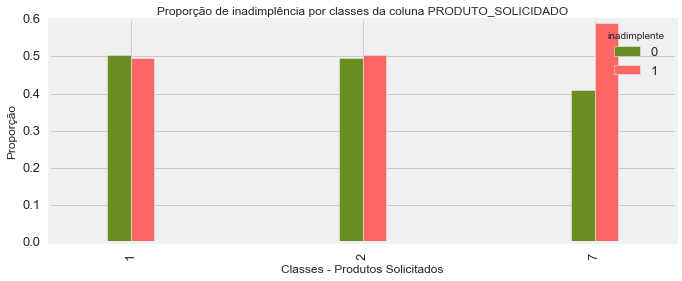

In [594]:
tabela_produto_solicitado.plot(kind='bar', width=0.2, color=['#6b8e23', '#ff6666'],figsize=(10,4))
plt.title('Proporção de inadimplência por classes da coluna PRODUTO_SOLICIDADO', fontdict={'fontsize':12})
plt.ylabel('Proporção')
plt.xlabel('Classes - Produtos Solicitados')
plt.show()

- O gráfico nos ajuda a ver as proporções de forma mais clara.

### 3) dia_vencimento

In [313]:
train['dia_vencimento'].value_counts()

10    7847
15    3557
25    3089
5     2825
20    1952
1      730
Name: dia_vencimento, dtype: int64

In [362]:
train['dia_vencimento'].value_counts(normalize=True)

10    0.39235
15    0.17785
25    0.15445
5     0.14125
20    0.09760
1     0.03650
Name: dia_vencimento, dtype: float64

- Podemos observar uma quantidade superior de vencimentos no dia 10, no gráfico de barras abaixo poderemos observar melhor.

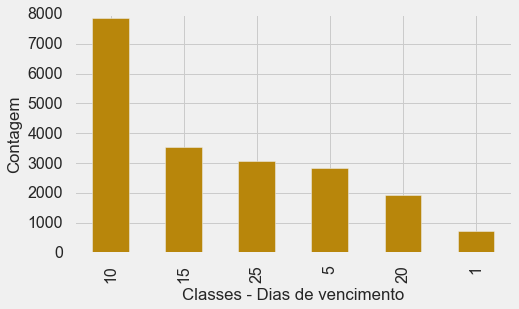

In [696]:
fig = plt.figure(figsize=(7,4))
train['dia_vencimento'].value_counts().plot.bar(color='#b8860b')
plt.xlabel('Classes - Dias de vencimento')
plt.ylabel('Contagem')
plt.show()

- Podemos observar que o dia 10 tem uma frequência maior e isso pode indicar proximidade ao dia do pagamento

In [314]:
tabela_dia_pagamento = pd.crosstab(train['dia_vencimento'], train['inadimplente'], normalize='index')
tabela_dia_pagamento

inadimplente,0,1
dia_vencimento,,
1,0.487671,0.512329
5,0.541947,0.458053
10,0.536893,0.463107
15,0.481867,0.518133
20,0.455943,0.544057
25,0.419553,0.580447


Insights:
- Podemos observar uma tendência de maior taxa de INADIMPLÊNCIA nos pagamentos que são efetuados a partir da metade do mês
- Hipótese 1: Será que os clientes que pagam nos dias 5 e 10 são assalariados? e por causa disso tem uma "estabilidade" maior em suas contas?
- Nos pagamentos do dia 1 notamos uma tendência maior a INADIMPLÊNCIA, isso se dá pela proximidade ao dia 25? Onde observamos o maios desbalanço entre as classes 

Text(0.5, 0, 'Classes - Dias de vencimento')

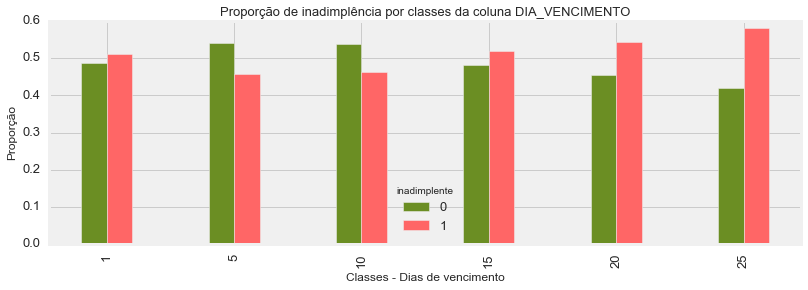

In [595]:
tabela_dia_pagamento.plot(kind='bar',width=0.4, color=['#6b8e23', '#ff6666'], figsize=(12,4))
plt.title('Proporção de inadimplência por classes da coluna DIA_VENCIMENTO', fontdict={'fontsize':13})
plt.ylabel('Proporção')
plt.xlabel('Classes - Dias de vencimento')

- Como já observamos na tabela a partir do meio do mês o número de INADIMPLENTES vai aumentando

- Temos um grande desbalanco entre as classes
- Hipótese: Criando dummies com essas classes melhora o desempenho do nosso modelo ?

### 4) forma_envio_solicitacao

In [360]:
train['forma_envio_solicitacao'].value_counts()

internet      11264
presencial     7855
correio         881
Name: forma_envio_solicitacao, dtype: int64

In [359]:
train['forma_envio_solicitacao'].value_counts(normalize=True)

internet      0.56320
presencial    0.39275
correio       0.04405
Name: forma_envio_solicitacao, dtype: float64

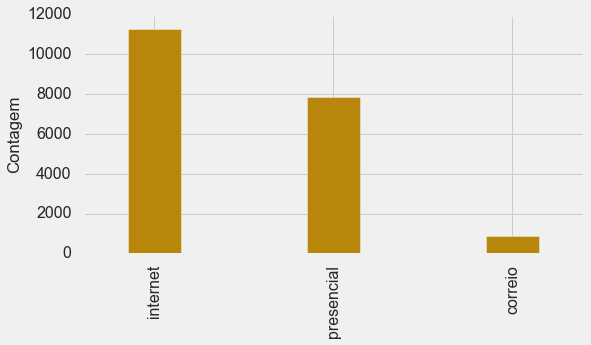

In [695]:
#gráfico de barras vai nos ajudar a visualizar melhor as classes
fig = plt.figure(figsize=(8,4))
train['forma_envio_solicitacao'].value_counts().plot.bar(width=0.3, color='#b8860b')
plt.ylabel('Contagem')
plt.show()

In [379]:
tabela_forma_envio_solicitacao = pd.crosstab(train['forma_envio_solicitacao'], train['inadimplente'], normalize=True)
tabela_forma_envio_solicitacao

inadimplente,0,1
forma_envio_solicitacao,,
correio,0.02380,0.02025
internet,0.28315,0.28005
presencial,0.19305,0.19970


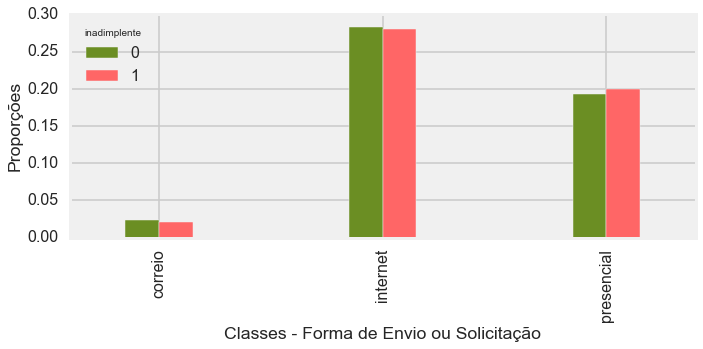

In [604]:
tabela_forma_envio_solicitacao.plot(kind='bar',width=0.3, figsize=(10,4), color=['#6b8e23', '#ff6666'])
plt.ylabel('Proporções')
plt.xlabel('Classes - Forma de Envio ou Solicitação')
plt.show()

Insights e Hipóteses:
- As classes INTERNET e PRESENCIAL estão bem balanceadas, no entando a classe CORREIO tem uma quantidade menor de inadimplentes
- Hipótese: Será que pessoas mais velhas usam o mais os correios e por isso há esse desbalanço nas classes da coluna INADIMPLENTE

### 5) tipo_endereco

In [361]:
train['tipo_endereco'].value_counts()

1    19873
2      127
Name: tipo_endereco, dtype: int64

In [355]:
train['tipo_endereco'].value_counts(normalize=True)

1    0.99365
2    0.00635
Name: tipo_endereco, dtype: float64

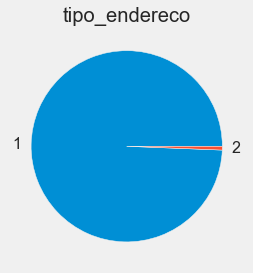

In [615]:
matplotlib.style.use('fivethirtyeight')
fig = plt.figure(figsize=(4,4))
train['tipo_endereco'].value_counts().plot.pie()
plt.title('tipo_endereco')
plt.ylabel('')
plt.show()

- A classe 1 tem a maioria dos valores

In [378]:
tabela_tipo_endereco = pd.crosstab(train['tipo_endereco'], train['inadimplente'],normalize='index')
tabela_tipo_endereco

inadimplente,0,1
tipo_endereco,,
1,0.499824,0.500176
2,0.527559,0.472441


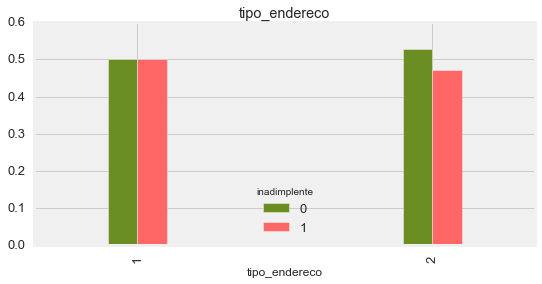

In [583]:
tabela_tipo_endereco.plot(kind='bar', width=0.2,figsize=(8,4), color=['#6b8e23', '#ff6666'])
plt.title('tipo_endereco')
plt.show()

- A CLASSE 1 da coluna TIPO_ENDERECO está bem balanceada diferentemente da CLASSE 2 que tem um pequeno desbalanço.
- Hipótese: Será que criando um dummie com a classe 2 para alimentar nosso modelo teremos um melhor desempenho?
- A classe 2 tem um pequeno desbalanço, mas essa classe representa 0.6% dos valores então não sei se adicionaria muita informação ao nosso modelo

### 6) sexo

In [363]:
train['sexo'].value_counts()

F    12246
M     7722
N       25
         7
Name: sexo, dtype: int64

In [364]:
train['sexo'].value_counts(normalize=True)

F    0.61230
M    0.38610
N    0.00125
     0.00035
Name: sexo, dtype: float64

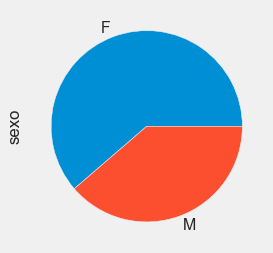

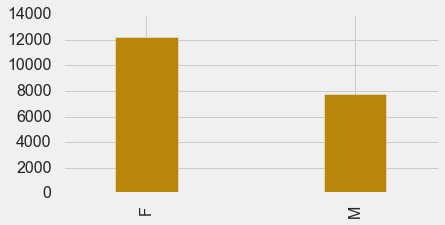

In [694]:
query_sexo = train.query('sexo =="F" or sexo=="M"')
fig=plt.figure(figsize=(4,4))
query_sexo['sexo'].value_counts().plot.pie()
fig=plt.figure(figsize=(6,3))
query_sexo['sexo'].value_counts().plot.bar(width=0.3, color='#b8860b')
plt.show()

In [396]:
query_sexo = train.query('sexo =="F" or sexo=="M"')
query['sexo'].value_counts()

F    12246
M     7722
Name: sexo, dtype: int64

In [409]:
query_sexo = train.query(' sexo =="F" or sexo=="M" ')
tabela_sexo = pd.crosstab(query_sexo['sexo'], train['inadimplente'], normalize='index')
tabela_sexo

inadimplente,0,1
sexo,,
F,0.511841,0.488159
M,0.481481,0.518519


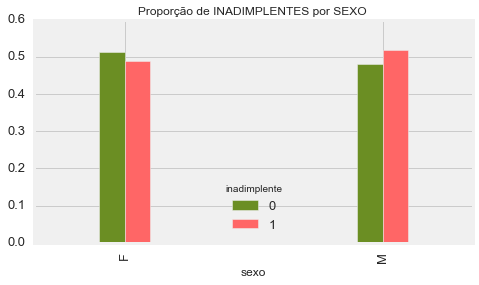

In [580]:
tabela_sexo.plot(kind='bar', figsize=(7,4), width=0.2, color=['#6b8e23', '#ff6666'])
plt.title('Proporção de INADIMPLENTES por SEXO ',fontdict={'fontsize':12})
plt.show()

Insights:
- Ambos os sexos tem um desbalanço na quantidade de inadimplências, o sexo F tende a ser menos inadimplente que o sexo M.


### 7) idade

In [415]:
train['idade'].describe()

count    20000.000000
mean        42.352500
std         14.930177
min          7.000000
25%         31.000000
50%         40.000000
75%         52.000000
max        106.000000
Name: idade, dtype: float64

- Valor Central: 42.35
- Desvio Padrão: 14.93

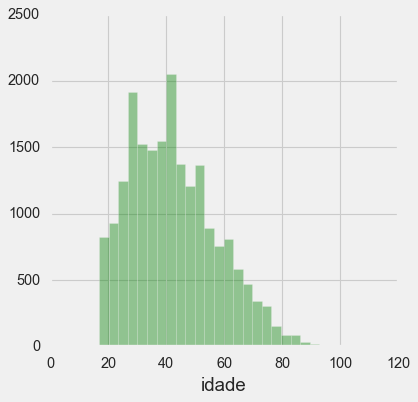

In [456]:
fig=plt.figure(figsize=(5,5))
ax = sns.distplot(a=train['idade'], color='green',bins=30, kde=False)

- A distribuição parece ser normal visualmente, mas vamos executar um teste de normalidade para saber exatamente.

def teste_normal(coluna):


In [514]:
#criei essa função para avaliar a normalidade de algumas colunas
def teste_normal(coluna):
    from scipy.stats import normaltest
    print('A hipótese H0 assume que a amostra É proveniente de uma distribuição normal.')
    print('A hipósete H1 assume que a a mostra NÃO é proveniente de uma distribuição normal.')
    print('')
    print('significância = 0.05')
    print('')
    print('Se P_VALOR < SINIFICÂNCIA, H0 é refutada, não é normal.')
    print('Se P_VALOR > SINIFICÂNCIA, H1 é refutada, é normal.')
    print('')
    print('')
    stat_test, p_valor = normaltest(coluna)
    if p_valor < 0.05:
        print('p_valor = {}, H0 refutada, NÃO É NORMAL'.format(p_valor))
    else:
        print('p_valor = {}, H1 refutada, É NORMAL'.format(p_valor))

In [515]:
teste_normal(train['idade'])

A hipótese H0 assume que a amostra É proveniente de uma distribuição normal.
A hipósete H1 assume que a a mostra NÃO é proveniente de uma distribuição normal.

significância = 0.05

Se P_VALOR < SINIFICÂNCIA, H0 é refutada, não é normal.
Se P_VALOR > SINIFICÂNCIA, H1 é refutada, é normal.


p_valor = 3.133408646418246e-208, H0 refutada, NÃO É NORMAL


- Resultado inesperado, a amostra das colunas IDADE não é normal.

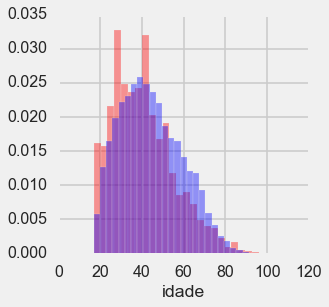

In [731]:
#sabendo que nossa coluna IDADE é normal, podemos comparar as amostras pelas classes da coluna INADIMPLENTE.
idade_inadimplente = train.query('inadimplente==1')
idade_nao_inadimplente = train.query('inadimplente==0')
plt.figure(figsize=(4,4))
ax = sns.distplot(a=idade_inadimplente['idade'], color='red',bins=30, kde=False, norm_hist=True)
ax2 = sns.distplot(a=idade_nao_inadimplente['idade'], color='blue',bins=30,kde=False, norm_hist=True)
#plt.xlabel('Idade', fontdict=10)

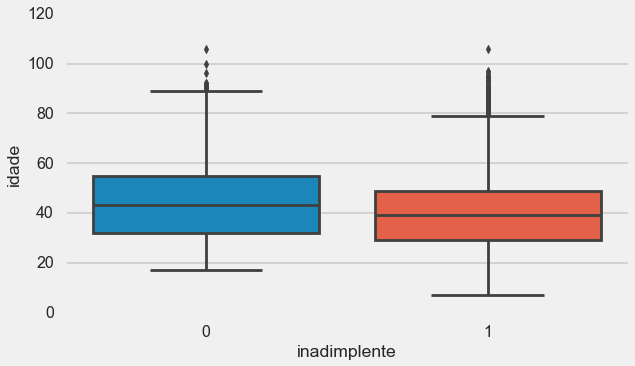

In [745]:
fig=plt.figure(figsize=(9,5))
sns.boxplot(x='inadimplente', y='idade', data=train)
plt.show()

- Os histogramas estão bem com os valores centrais bem próximos, mas não posso afirmar estatísticamente se  a mesma distribuição.
- Hipótese: Será que a amostra de NÃO INADIMPLENTES e INADIMPLENTES são estatísticamente iguais?

- Para responder a Hipótese podemos fazer um Teste de Hipóteses, no entanto esse teste tem como premissa a **NORMALIDADE** das amostras
- Outra opção que temos são os testes não paramétricos que não precisam que a amostra seja normal para funcionar
- Antes disso vou transformar os valores das colunas idade com LOG e RAIZ QUADRADA e refazer o teste de normalidade para ver se obtemos alguma melhore.

LOG1P

In [518]:
#criando uma coluna com o (1 + log) nas linhas da coluna idade
train['log1p_idade'] = train['idade'].map(lambda i : np.log1p(i))

In [520]:
teste_normal(train['log1p_idade'])

A hipótese H0 assume que a amostra É proveniente de uma distribuição normal.
A hipósete H1 assume que a a mostra NÃO é proveniente de uma distribuição normal.

significância = 0.05

Se P_VALOR < SINIFICÂNCIA, H0 é refutada, não é normal.
Se P_VALOR > SINIFICÂNCIA, H1 é refutada, é normal.


p_valor = 1.609832922320197e-191, H0 refutada, NÃO É NORMAL


LOG

In [517]:
#criando uma coluna com o (log) nas linhas da coluna idade
train['log_idade'] = train['idade'].map(lambda i : np.log(i))

In [540]:
teste_normal(train['log_idade'])

A hipótese H0 assume que a amostra É proveniente de uma distribuição normal.
A hipósete H1 assume que a a mostra NÃO é proveniente de uma distribuição normal.

significância = 0.05

Se P_VALOR < SINIFICÂNCIA, H0 é refutada, não é normal.
Se P_VALOR > SINIFICÂNCIA, H1 é refutada, é normal.


p_valor = 5.6699734861692946e-185, H0 refutada, NÃO É NORMAL


RAIZ QUADRADA

In [516]:
#criando uma coluna com o (raiz quadrada) nas linhas da coluna idade
train['sqrt_idade'] = train['idade'].map(lambda i : np.sqrt(i))

In [522]:
teste_normal(train['sqrt_idade'])

A hipótese H0 assume que a amostra É proveniente de uma distribuição normal.
A hipósete H1 assume que a a mostra NÃO é proveniente de uma distribuição normal.

significância = 0.05

Se P_VALOR < SINIFICÂNCIA, H0 é refutada, não é normal.
Se P_VALOR > SINIFICÂNCIA, H1 é refutada, é normal.


p_valor = 5.787836350634461e-170, H0 refutada, NÃO É NORMAL


- Nenhum dos testes nos ajudou significativamente, então continuaremos com os teste não paramétricos.


### 8) estado_civil

In [543]:
train['estado_civil'].value_counts()

2    10088
1     6519
4     1573
6      763
5      522
3      234
7      220
0       81
Name: estado_civil, dtype: int64

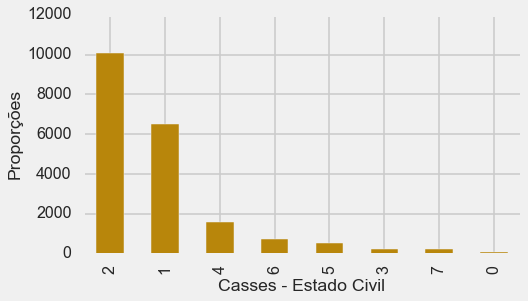

In [709]:
train['estado_civil'].value_counts().plot(kind='bar', figsize=(7,4), color='#b8860b')
plt.xlabel('Casses - Estado Civil')
plt.ylabel('Proporções')
plt.show()

- Vemos uma prevalência na classe 2 pois representa mais da metade dos dados.

In [563]:
tabela_estado_civil = pd.crosstab(train['estado_civil'], train['inadimplente'], normalize='index')
tabela_estado_civil

inadimplente,0,1
estado_civil,,
0,0.543210,0.456790
1,0.453290,0.546710
2,0.520420,0.479580
3,0.542735,0.457265
4,0.571519,0.428481
5,0.517241,0.482759
6,0.448231,0.551769
7,0.513636,0.486364


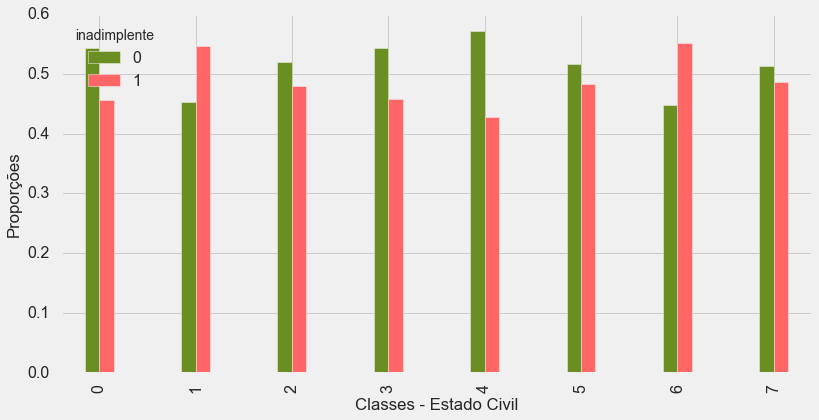

In [637]:
tabela_estado_civil.plot(kind='bar', figsize=(12,6), width=0.3, color=['#6b8e23', '#ff6666'])
plt.xlabel('Classes - Estado Civil')
plt.ylabel('Proporções')
plt.show()

Insights e Hipóteses:
- Todos os estados civis apresentam um desbalanço entra as classes INADIMPLENTE, alguns pra NAO INADIMPLENTE e outros pra INADIMPLENTES

### 9) Qtde_dependentes

In [626]:
train['qtde_dependentes'].value_counts()

0     13350
1      2814
2      2189
3      1029
4       352
5       149
6        57
7        22
8        14
9         9
10        7
11        4
13        2
14        1
53        1
Name: qtde_dependentes, dtype: int64

- O valor de quantidade de dependentes igual a 53 parece ser um outlier então o descartaremos para não atrappalhar nossas análises.

In [655]:
#filtrando o valor discrepante do dataframe
query_qtde_dependentes = train.query('qtde_dependentes < 53')

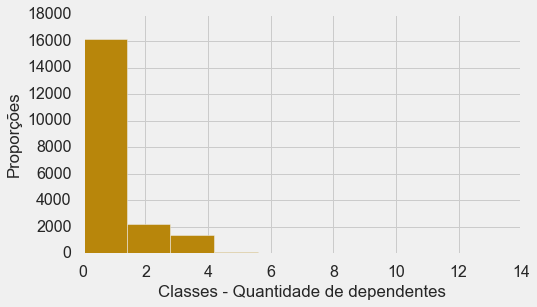

In [687]:
query_qtde_dependentes['qtde_dependentes'].plot(kind='hist', figsize=(7,4),color='#b8860b')
plt.xlabel('Classes - Quantidade de dependentes')
plt.ylabel('Proporções')
plt.show()

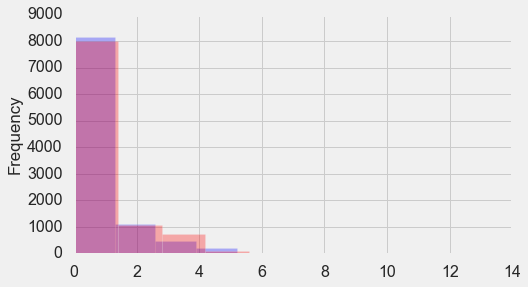

In [662]:
#sabendo que nossa coluna IDADE é normal, podemos comparar as amostras pelas classes da coluna INADIMPLENTE.
idade_inadimplente = train.query('inadimplente==1 and qtde_dependentes < 53')
idade_nao_inadimplente = train.query('inadimplente==0 and qtde_dependentes < 53')
#ax1 = sns.distplot(a=idade_inadimplente['qtde_dependentes'], color='red',bins=30, kde=False, norm_hist=True)
idade_nao_inadimplente['qtde_dependentes'].plot(kind='hist', figsize=(7,4),color='blue', alpha=0.3)
#ax2 = sns.distplot(a=idade_nao_inadimplente['idade'], color='blue',bins=30,kde=False, norm_hist=True)
idade_inadimplente['qtde_dependentes'].plot(kind='hist', figsize=(7,4),color='red', alpha=0.3)
#plt.xlabel('Idade', fontdict=10)
plt.show()

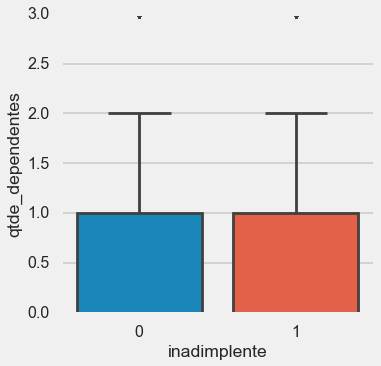

In [752]:
#ignorei os outliers para facilitar a visualização dos box
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='inadimplente', y=train.query('qtde_dependentes < 4')['qtde_dependentes'], data=train)
plt.show()

- Os valores das classes separados por INADIMPLENTE e NAO INADIMPLENTE estão bem equilibrados.
- O boxplot nos ajuda a visualizar melhor o equilíbrio.

### 10) grau_instrucao

In [671]:
train['grau_instrucao'].value_counts()

0    20000
Name: grau_instrucao, dtype: int64

- Essa coluna contém apenas valores nulos, logo não há utilidade em usa-la

### 11) nacionalidade

In [674]:
train['nacionalidade'].value_counts()

1    19152
0      808
2       40
Name: nacionalidade, dtype: int64

In [676]:
train['nacionalidade'].value_counts(normalize='index')

1    0.9576
0    0.0404
2    0.0020
Name: nacionalidade, dtype: float64

- a nacionalidade de classe 1 representa a maioria dos valores, acredito que a classe 1 represente a nacionalidade brasileira.

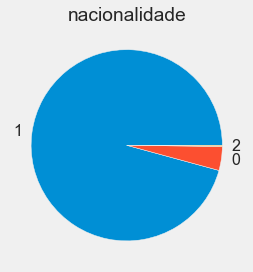

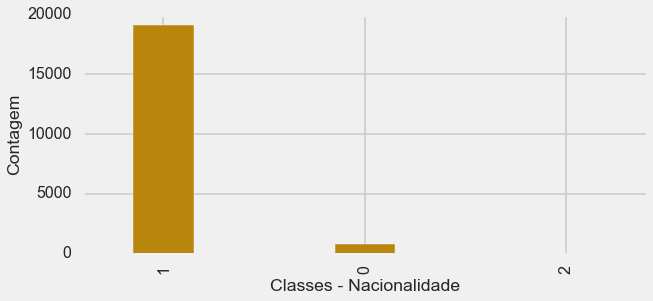

In [710]:
train['nacionalidade'].value_counts().plot(kind='pie', figsize=(8,4))
plt.title('nacionalidade')
plt.ylabel('')
plt.show()
train['nacionalidade'].value_counts().plot(kind='bar', width=0.3, figsize=(9,4), color='#b8860b')
#plt.title()
plt.xlabel('Classes - Nacionalidade')
plt.ylabel('Contagem')
plt.show()

In [714]:
tabela_nacionalidade = pd.crosstab(train['nacionalidade'], train['inadimplente'], normalize='index')
tabela_nacionalidade

inadimplente,0,1
nacionalidade,,
0,0.501238,0.498762
1,0.499948,0.500052
2,0.500000,0.500000


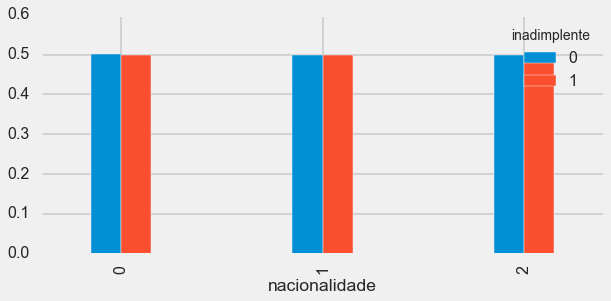

In [719]:
tabela_nacionalidade.plot(kind='bar',width=0.3, figsize=(9,4))
plt.show()

- As classes estão bem balanceadas, principalmente a classe 1 que representa a maioria dos dados.

### 12) estado_onde_nasceu

In [720]:
train['estado_onde_nasceu'].value_counts()

BA    2351
SP    2336
RS    1919
CE    1910
PE    1651
MG    1446
RN     827
       822
PR     764
RJ     720
AL     678
PA     676
PB     608
MA     577
GO     460
MT     375
PI     284
SC     271
ES     251
MS     199
AC     192
SE     153
AM     147
DF     131
AP     102
TO      82
RO      53
RR      15
Name: estado_onde_nasceu, dtype: int64

In [477]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_solicitante                    20000 non-null  int64  
 1   produto_solicitado                20000 non-null  int64  
 2   dia_vencimento                    20000 non-null  int64  
 3   forma_envio_solicitacao           20000 non-null  object 
 4   tipo_endereco                     20000 non-null  int64  
 5   sexo                              20000 non-null  object 
 6   idade                             20000 non-null  int64  
 7   estado_civil                      20000 non-null  int64  
 8   qtde_dependentes                  20000 non-null  int64  
 9   grau_instrucao                    20000 non-null  int64  
 10  nacionalidade                     20000 non-null  int64  
 11  estado_onde_nasceu                20000 non-null  object 
 12  esta

In [489]:
df = train[['produto_solicitado', 'dia_vencimento', 'profissao', 'ocupacao', 'inadimplente']]
df= df.fillna(-1)

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   produto_solicitado   20000 non-null  int64  
 1   dia_vencimento       20000 non-null  int64  
 2   profissao            20000 non-null  float64
 3   ocupacao             20000 non-null  float64
 4   local_onde_reside    20000 non-null  float64
 5   local_onde_trabalha  20000 non-null  float64
 6   inadimplente         20000 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.1 MB


In [499]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,produto_solicitado,produto_solicitado,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,produto_solicitado,dia_vencimento,0.000000,regression,True,mean absolute error,5.2392,5.653620,DecisionTreeRegressor()
2,produto_solicitado,profissao,0.000000,regression,True,mean absolute error,2.8906,3.870089,DecisionTreeRegressor()
3,produto_solicitado,ocupacao,0.000000,regression,True,mean absolute error,1.4330,1.445610,DecisionTreeRegressor()
4,produto_solicitado,inadimplente,0.000000,regression,True,mean absolute error,0.4926,0.499272,DecisionTreeRegressor()
5,dia_vencimento,produto_solicitado,0.000000,regression,True,mean absolute error,0.2672,0.455918,DecisionTreeRegressor()
6,dia_vencimento,dia_vencimento,1.000000,predict_itself,True,None,0.0000,1.000000,None
7,dia_vencimento,profissao,0.000000,regression,True,mean absolute error,2.8906,3.870134,DecisionTreeRegressor()
8,dia_vencimento,ocupacao,0.000000,regression,True,mean absolute error,1.4330,1.465682,DecisionTreeRegressor()
9,dia_vencimento,inadimplente,0.000000,regression,True,mean absolute error,0.4926,0.497179,DecisionTreeRegressor()
